# 3.3 Eigenvalue Problems

In [1]:
from IPython.display import Image

The solution of eigenvalue problems numerically is quite lengthy. In quantum mechanics and other branches of physics, there are lots of eigenvalue equations. Now, we can express eigenvalue equation by,
$$ \frac{d}{dx} \left( P(x)\frac{dy}{dx} \right) = Q(\lambda, x) y + R(x) $$
with known values $y(x_0)=y_0$ and $y(x_N)=y_N$. This is known as **Sturm-Liouville eigenvalue problems**. The above equation can be written as,
$$ \frac{d^2y}{dx^2} = p(x) \frac{dy}{dx} + q(\lambda, x)y + r(x) $$
with known values $y(x_0)=y_0$ and $y(x_N)=y_N$. These conditions are followed by some specific values of $\lambda$. These values are known as eigenvalues. The eigenfunction corresponding to an eigenvalue contains specific number of nodes (where the function goes 0). All the eigenfunctions forms an orthonormal set. More specifically, if $\phi_n(x)$ is the eigenfunction associated with eigenvalue $\lambda_n$ ($n=1,2,3,...$), then it would contain $n-1$ number of nodes. The eigenvalues have a minimum value (say $\lambda_1$) but no specific maximum value. The orthonormal condition can be written as, $\left< \phi_m|\phi_n\right> = \delta_{m,n}$.

We can solve this eigenvalue problem by solving the following steps numerically -

1. We need to have the boundary values $y_0$ and $y_N$. Now, we need to assume the slope (\alpha) at the initial point. The magnitude of slope would be adjusted by numerical calculations but the sign of the slope is important. Now,
$$ \alpha = \frac{y_1-y_0}{h} \implies y_1 = y_0 +\alpha\, h $$
For positive slope, $y_1>y_0$ (graph will increase from initial point) and for negative slope, $y_1<y_0$ (graph will decrease from initial point).

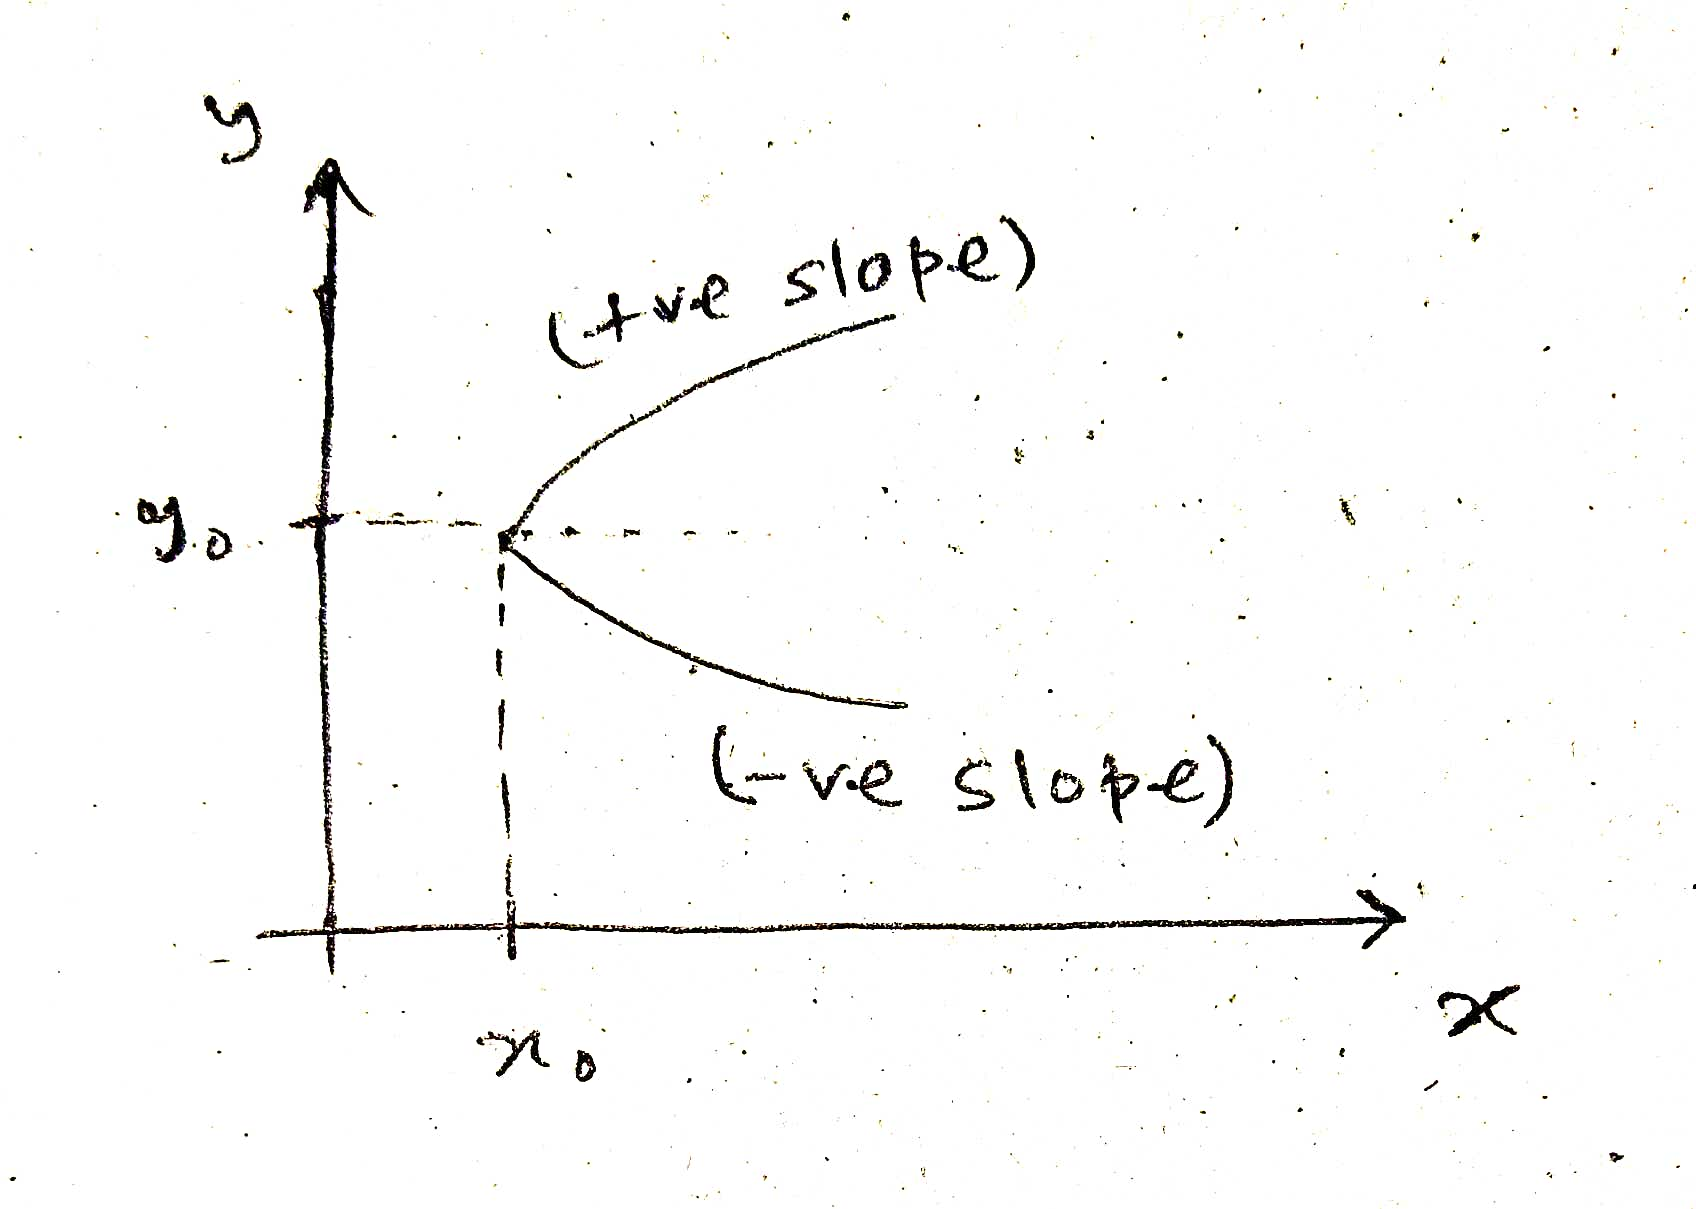

In [2]:
Image(filename='notes/sem_4_5_Ch3_y1_sign.jpg')

2. An upper and a lower value is to be given for $\lambda$ and then by bisection method $\lambda$ will be chosen. For a certain $\lambda$, $y(x)$ can be calculated by central difference method. Now, that eigenvalue will correspond to some specific number of nodes. If nodes are counted in limit $(x_0,x_N)$ and matched with the needed number of nodes, we can go one step ahead towards the value of $\lambda$.

3. Now, for that obtained $\lambda$, the boundary condition $y(x_N)=y_N$ is to be matched. If it's not matched, $\lambda$ will be modified accordingly again by bisection method. Iterating this method we can get value of $\lambda_n$ and calculate corresponding eigenfunction $\phi_n(x)$ by central difference method.

4. Now, once an eigenfunction is obtained, we need to normalize it. For an eigenfunction $\phi(x)$, let, $\psi(x)=A\phi(x)$, where $A$ is the normalization constant. Now, the normalization condition is,
$$ \int_{-\infty}^{\infty} |\psi(x)|^2\, dx = 1$$
By this, $A$ can be calculated.

That's all we need to do to get eigenvalue $\lambda_n$ and corresponding normalized eigenfunction $\psi_n(x)$ from an eigenvalue problem.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 3.3.1 Numerical solution by Central Difference method

### Propagator with central difference calculation
Function: **`prop_central_diff(pr, p, q, r, x, y, dx)`**

**Algorithm:**

1. Define $p(x),q(\lambda,x),r(x)$.
2. x array and y array
3. h = dx = x[1] - x[0]
4. N = len(x)
5. Write $a,b,c,d$ and $y_i$ for i in range(N).

$$ y(x_i) = \frac{a}{d} \,y(x_{i-1}) + \frac{b}{d}\, y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2 + h^2 q(\lambda, x_{i-1}) $$
$$ b = -\left(1 + \frac{h}{2}\, p(x_{i-1}) \right) $$
$$ c = h^2 r(x_{i-1}) $$
$$ d = 1 - \frac{h}{2}\, p(x_{i-1}) $$

In [4]:
from Ch3_3_fuctions import prop_central_diff
print(prop_central_diff.__doc__)


    y'' + py' + qy + r = 0
    p = p(x), q = q(lb, x), r = r(x)
    


### Normalization

In [5]:
from Ch3_3_fuctions import psiNorm

### Determination of eigenvalue and eigenfunction
Function: **`center_diff_eigval(pr_min, pr_max, p, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, max_itr)`**

In [6]:
from Ch3_3_fuctions import center_diff_eigval
print(center_diff_eigval.__doc__)


    x0, y0 - left boundary condition
    xN, yN - right boundary condition
    y1 - estimation of solution at the next point after left boundary (y0)
    


## 3.3.2 Numerov Method

This method is used for *linear eigenvlaue problem*. The differential equation is, 
$$ \frac{d^2y}{dx^2} = q(\lambda, x) y(x) + r(x) $$
The Schrodinger equation is this kind of problem.

For this problem also, the specified boundary is $(x_0,y_0)$ and $(x_N,y_N)$ and some intermediate point is $(x_i,y_i)$ where $0<i<N$.

The Taylor series expansion at some point $x=x_i$ is,
$$ y(x_{i}+h) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
Here, this can be written as,
$$ y(x_{i+1}) = y(x_{i})+hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})+\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})+\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
and,
$$ y(x_{i-1}) = y(x_{i})-hy^{\prime}(x_{i})+\frac{h^{2}}{2!}y^{\prime\prime}(x_{i})-\frac{h^{3}}{3!}y^{(3)}(x_{i})+\frac{h^{4}}{4!}y^{(4)}(x_{i})-\frac{h^{5}}{5!}y^{(5)}(x_{i})+O(h^{6}) $$
By adding these 2 equations,
$$ y(x_{i+1})-2y(x_{i})+y(x_{i-1}) = h^{2}y_{i}^{\prime\prime} + 2\frac{h^{4}}{4!}y_{i}^{(4)}+O(h^{6}) $$
For the fourth order differentiation, we can do it by,
$$ y^{(4)}(x_{i}) = \frac{d^{2}}{dx^{2}}\left(\frac{d^{2}y}{dx^{2}}\right)_{x=x_{i}}=\frac{d^{2}}{dx^{2}}(q(\lambda,x)y(x)+r(x))_{x=x_{i}} $$

$$ \implies h^{2}y^{(4)}(x_{i}) = q(\lambda,x_{i+1})y(x_{i+1})-2q(\lambda,x_{i})y(x_{i})+ q(\lambda,x_{i-1})y(x_{i-1}) \\
+r(x_{i+1})-2r(x_{i})+r(x_{i-1})+O(h^{4}) $$
Replacing this in the previous equation,
$$ y(x_{i+1})-2y(x_i) + y(x_{i-1}) = h^2 \,[\,q(\lambda,x_i)y(x_i)+ r(x_i)] + \frac{h^2}{12} [q(\lambda, x_{i+1}) y(x_{i+1}) + r(x_{i+1}) \\
-2q(\lambda,x_{i})y(x_{i}) - 2r(x_i) +  q(\lambda,x_{i-1})y(x_{i-1}) + r(x_{i-1}) \,] + O(h^6) $$

$$ \implies y(x_{i+1})\left(1-\frac{h^{2}}{12}q(\lambda,x_{i+1})\right) - 2y(x_{i}) \left(1+\frac{5h^{2}}{12}q(\lambda,x_{i+1})\right) + y(x_{i-1}) \left(1-\frac{h^{2}}{12}q(\lambda,x_{i-1})\right) \\
= \frac{h^{2}}{12} \left(r(x_{i+1}) + 10r(x_i) + r(x_{i-1})\right) + O(h^6) $$

The reduced equation is (using the transformation $i\rightarrow i-1$) is,
$$ y(x_i) = \frac{a}{d} y(x_{i-1}) + \frac{b}{d} y(x_{i-2}) + \frac{c}{d} $$
where,
$$ a = 2\left(1 + \frac{5h^2}{12}q(\lambda, x_{i-1})\right) $$
$$ b = -\left(1 - \frac{h^2}{12}q(\lambda, x_{i-2})\right) $$
$$ c = \frac{h^2}{12}\left(r(x_i) + 10 \, r(x_{i-1}) + r(x_{i-2})\right) $$
$$ d = 1 - \frac{h^2}{12}q(\lambda, x_i) $$

### Numerical solution by Numerov Method

### Propagator with Numerov Method
Function: **`propNumerov`**

This function takes an eigenvalue as an input and returns the corresponding eigenfunction.

**Algorithm:**

1. Define functions $p(x)$ and $q(\lambda, x)$.
2. h = x[1] - x[0].
3. xi = x0 + ih for i in range(N).
4. Write relations for $a,b,c,d$ and $y_i$ for i in range(2,N).

In [7]:
from Ch3_3_fuctions import propNumerov

### Solving the eigenvalue problem
Function: **`NumerovEigVal`**

Here, the steps mentioned in the **"Eigenvalue Problems"** section are applied.

In [8]:
from Ch3_3_fuctions import NumerovEigVal

In [9]:
print(f'propNumerov: {propNumerov.__doc__}')
print(f'\nNumerovEigVal: {NumerovEigVal.__doc__}')

propNumerov: 
    q = q(lambda, x), r = r(x)
    x - x array of propagation
    y - y array of propagation (a zero list generally)
    dx - increment along x axis
    yy - returned y array
    

NumerovEigVal: 
    prMin, prMax - lower and upper limit of eigenvalue
    q = q(lambda, x), r = r(x)
    x0, y0 - left boundary conditions
    xN, yN - right boundary conditions
    y1 - next y value after y0
    dx - increment along x axis
    nodes - no. of nodes of eigenvalue
    tol - tolerance
    mxItr - maximum allowed iteration
    Return: pr, x, yy
        pr - eigenvalue
        x - x array of solution
        yy = y array of solution
    


### Example (Numerov method)
Plot solution of the eigenvalue equation,
$$ \frac{d^2y}{dx^2} = -\lambda y(x) $$ 
with boundary conditions,
$\quad y(0) = 0 \quad$ and $\quad y(2\pi) = 0$.

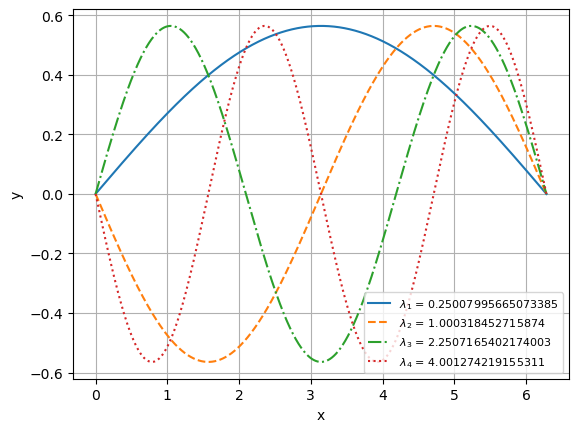

In [10]:
def q(lam, x):
    return -lam
def r(x):
    return 0

dx = 0.001
tol = 1e-6
mxitr = 100
lmin, lmax = 0.1, 30
x0, y0, xN, yN = 0, 0, 2*np.pi, 0

sty = ['-', '--', '-.', ':']
for nodes in range(4):
    y1 = (-1)**nodes*1e-4
    lam, x, y = NumerovEigVal(lmin, lmax, q, r, x0, y0, xN, yN, y1, dx, nodes, tol, mxitr)
    y = psiNorm(y, dx)
    plt.plot(x, y, sty[nodes], label=f'$\lambda_{nodes+1}$ = {lam}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', prop={'size':8})
plt.grid()
plt.show()